In [16]:
import pandas as pd


df = pd.read_csv("Indian_Kids_Screen_Time.csv")

# Check if there are any missing values
df.isnull().values.any()

# count missing values in each column
df.isnull().sum()

,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [ ]:
df.describe(include='all')

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
count,9712.000000,9712,9712.000000,9712,9712,9712.000000,6494,9712
unique,NaN,2,NaN,4,2,NaN,15,2
top,NaN,Male,NaN,Smartphone,True,NaN,Poor Sleep,Urban
freq,NaN,4942,NaN,4568,8301,NaN,2268,6851
mean,12.979201,NaN,4.352837,NaN,NaN,0.427226,NaN,NaN
std,3.162437,NaN,1.718232,NaN,NaN,0.073221,NaN,NaN
min,8.000000,NaN,0.000000,NaN,NaN,0.300000,NaN,NaN
25%,10.000000,NaN,3.410000,NaN,NaN,0.370000,NaN,NaN
50%,13.000000,NaN,4.440000,NaN,NaN,0.430000,NaN,NaN
75%,16.000000,NaN,5.380000,NaN,NaN,0.480000,NaN,NaN


In [3]:
df['Health_Impacts'].isnull().value_counts()

,count
Health_Impacts,
False,6494
True,3218


In [17]:
df['Health_Impacts'] = df['Health_Impacts'].fillna("No health issues")
print(df['Health_Impacts'].value_counts())


Health_Impacts
No health issues                                 3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64


In [2]:
import pandas as pd

# Define bins and labels
bins = [7, 12, 15, 18]
labels = ["Kids (8-12)", "Teens (13-15)", "Older Teens (16-18)"]

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df[['Age', 'Age_Group']])


      Age            Age_Group
0      14        Teens (13-15)
1      11          Kids (8-12)
2      18  Older Teens (16-18)
3      15        Teens (13-15)
4      12          Kids (8-12)
...   ...                  ...
9707   17  Older Teens (16-18)
9708   17  Older Teens (16-18)
9709   16  Older Teens (16-18)
9710   17  Older Teens (16-18)
9711   15        Teens (13-15)

[9712 rows x 2 columns]


In [41]:
df['Health_Impacts'].isnull().sum()
df.isnull().sum()


,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,0
Urban_or_Rural,0
Age_Band,0
Health_Category,0


In [15]:
print(df.columns.tolist())


['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device', 'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio', 'Health_Impacts', 'Urban_or_Rural', 'Age_Band', 'Health_Category']


In [53]:

df['Health_Impacts'] = df['Health_Impacts'].astype(str).str.strip().str.lower()

# Mapping dictionary
health_map = {
    "eye strain": "Physical",
    "headache": "Physical",
    "obesity": "Physical",
    "neck pain": "Physical",
    "back pain": "Physical",
    "poor posture": "Physical",
    "fatigue": "Physical",


    "anxiety": "Mental",
    "depression": "Mental",
    "stress": "Mental",
    "poor sleep": "Mental",
    "reduced attention span": "Mental",
     "addiction": "Mental",
    "no health issues": "None",
    "none": "None",
    "no issue": "None",
    "no issues": "None"
}

# Apply mapping
df['Health_Category'] = df['Health_Impacts'].map(health_map)







In [54]:
# --- 3. Create summary table (cross-tabulation) ---
summary = pd.crosstab(df['Age_Band'], df['Health_Category'])

summary


Health_Category,Mental,None,Physical
Age_Band,,,
Pre-teens (7-12),1103,1795,257
Teenagers (13-16),1044,949,249
Late Teens (17-18),506,474,138


In [45]:
df['Health_Impacts'].isnull().sum()
df.isnull().sum()


,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,0
Urban_or_Rural,0
Age_Band,0
Health_Category,0


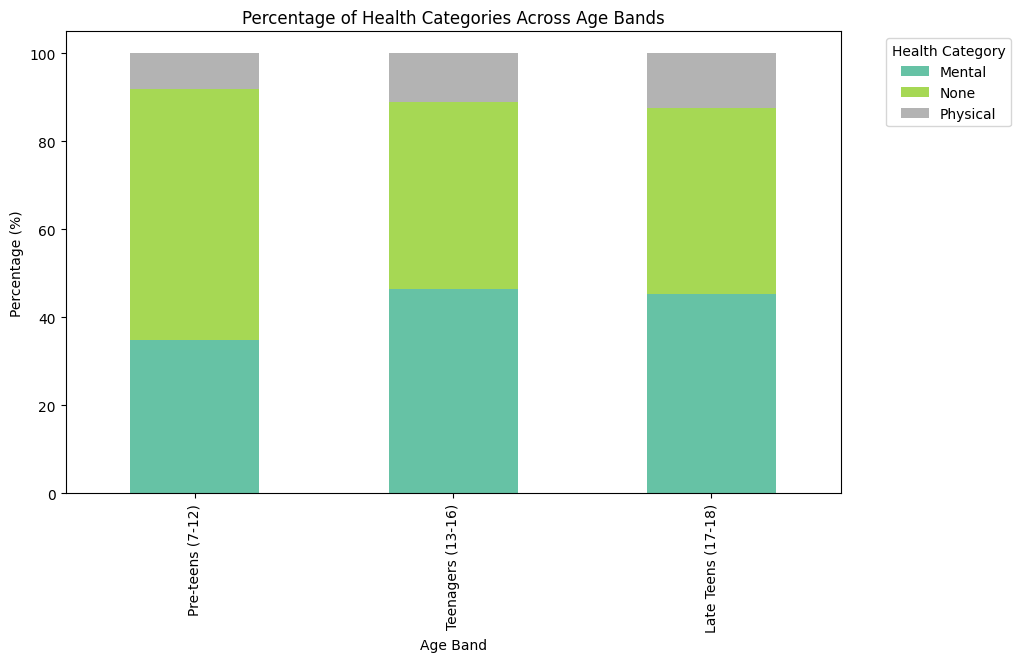

In [56]:
import matplotlib.pyplot as plt

# Calculate percentages
pivot_percent = summary.div(summary.sum(axis=1), axis=0) * 100

pivot_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Percentage of Health Categories Across Age Bands")
plt.ylabel("Percentage (%)")
plt.xlabel("Age Band")
plt.legend(title='Health Category', bbox_to_anchor=(1.05, 1))
plt.show()

1.Age Bands:

Pre-teens: 8 to 12 years

Teenagers: 13 to 16 years

Late Teens: 17 to 18 years

2.Health Categories:

i) Physical: Eye strain, Headache, Obesity, Back/Neck pain, Poor posture, Fatigue

ii) Mental: Poor sleep, Stress, Anxiety, Depression, Reduced attention span, Addiction

iii) None: No health issues



Mapped health impacts into Physical, Mental, or None



2.Insights from Graphs:

i)Pre-teens: mostly Physical health issues

ii)Teenagers: higher proportion of Mental health issues

iii)Late Teens: mixed Physical and Mental, some with No health issues

3.Benefits of Categorization:

i)Combines Age + Health Impact for meaningful analysis

ii)Helps identify which age group is most affected by each health issue

iii)Supports targeted recommendations and policy decisions

[14 11 18 15 12 17 10 13  9  8 16]
